In [1]:
! pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=7c038b4387766e2e1869b0e21fb4f89d7ea80d876d5ba827b838c9c0de9b0606
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [2]:
import wikipedia
page_title = "Jazz"
wikipedia.set_lang("en")  # vrem articole in Engleza
page = wikipedia.page(page_title, auto_suggest=False)

print(page.content[:200])

Jazz is a music genre that originated in the African-American communities of New Orleans, Louisiana, United States, in the late 19th and early 20th centuries, with its roots in blues and ragtime. Sinc


In [3]:
import gensim.downloader as api
google_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [40]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
data = word_tokenize(page.content)
data = [word for word in data if word not in string.punctuation]
sw = stopwords.words('english')
data = [word for word in data if word not in sw]
data = [word for word in data if word.isnumeric() == False]
data = list(set(data))

In [56]:
ct_exist, ct_not_exist = 0, 0
for word in data:
    if word in google_model.vocab:
        ct_exist += 1
    else:
        ct_not_exist += 1
print(str(ct_exist) + " words exist in Google word2vec vocab and " + str(ct_not_exist) + " don't")

3336 words exist in Google word2vec vocab and 311 don't


In [59]:
similarities = []
for i in range(len(data)):
    if data[i] in google_model.vocab:
        for j in range(i+1, len(data)):
            if data[j] in google_model.vocab:
                similarities.append((google_model.similarity(data[i], data[j]), data[i], data[j]))

(-0.23158434, 'Mr.', 'Wheeler')


In [60]:
similarities = sorted(similarities)
print(similarities[0], similarities[1], similarities[2])
print(similarities[-1], similarities[-2], similarities[-3])

(-0.23158434, 'Mr.', 'Wheeler') (-0.22243124, 'Thing', 'However') (-0.22220989, 'Furthermore', 'Thing')
(0.9703434, 'four', 'three') (0.96359354, 'October', 'February') (0.95794386, 'October', 'August')


In [5]:
text8 = api.load("text8")  # descarcam corpusul
text8_model = w2v(text8).wv

[==================================================] 100.0% 31.6/31.6MB downloaded


In [6]:
print("Smart")
print(google_model.most_similar("smart"))
print(text8_model.most_similar('smart'))

print("King")
print(google_model.most_similar("king"))
print(text8_model.most_similar('king'))

print("Big")
print(google_model.most_similar("big"))
print(text8_model.most_similar('big'))

Smart
[('intelligent', 0.6495277881622314), ('dumb', 0.5792694687843323), ('smartest', 0.5717369318008423), ('savvy', 0.5674132108688354), ('clever', 0.5656732320785522), ('smarter', 0.5632593631744385), ('shrewd', 0.5591170191764832), ('IPICO_produces', 0.5158056020736694), ('economic_certainty_Kracmer', 0.5094711184501648), ('Smart', 0.4991162121295929)]
[('toy', 0.6894603967666626), ('pda', 0.6512291431427002), ('swapping', 0.6478596925735474), ('lazy', 0.638542652130127), ('pet', 0.6379531025886536), ('printer', 0.6256910562515259), ('cracker', 0.62309330701828), ('dolls', 0.6218711137771606), ('clever', 0.6186498403549194), ('kit', 0.6176069378852844)]
King
[('kings', 0.7138046026229858), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864822864532471), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.543294370174408), ('throne', 0.5422104597091675)

Se poate observa pentru cuvantul king cum atat modelul de la Google cat si cel text8 au prezis cuvinte foarte apropiate semnatic de cuvantul de baza, in timp ce pentru celelalte 2 cuvinte date (smart si big), doar modelul Google a reusit sa prezica cuvinte apropiate semantic.

Aceasta diferenta de performanta poate vine si din cauza complexitatii fiecarui corpus, fapt pe care l-am observat din dimensiunile de download al api-urilor (31MB vs 1.6GB)

In [21]:
# vom plota embedding-urile pentru urmatoarele cuvinte
words = ["car", "motorcycle", "bike", "man", "person", "woman", "child", "king", "queen", "prince", "plant", "tree", "flower"]

# acestia sunt vectorii lor
vectors_google = [google_model[word] for word in words]
vectors_text8 = [text8_model[word] for word in words]

In [24]:
# folosim PCA pentru a reduce vectorii la 2D
pca = PCA(n_components=2)
pca.fit(vectors_google)
vectors_2d_google = pca.transform(vectors_google)
pca.fit(vectors_text8)
vectors_2d_text8 = pca.transform(vectors_text8)

Google


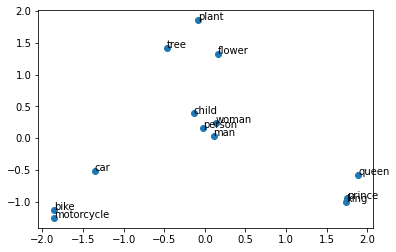

text8


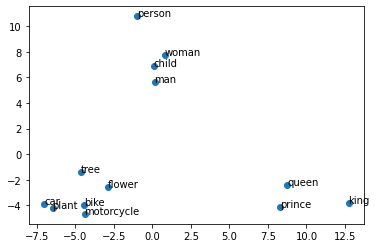

In [25]:
print("Google")
x = [v[0] for v in vectors_2d_google]
y = [v[1] for v in vectors_2d_google]
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(words):
    ax.annotate(txt, (x[i], y[i]))
plt.show()

print("text8")
x = [v[0] for v in vectors_2d_text8]
y = [v[1] for v in vectors_2d_text8]
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(words):
    ax.annotate(txt, (x[i], y[i]))
plt.show()

Modelul de la Google indica o acuratete mai mare, dat fiind ca a reusit sa separe mai bine in clustere semantic cuvintele date: cele legate de persoana in mijloc, iar functii in dreapta jos, biciclete/motociclete in stanga jos, iar masina, care e legat de transport, e apropiate de acelea 2. Asemenea si pentru tree si flower.

Modelul antrenat cu text8 a reusit sa separe si el aproape bine in clustere, doar ca a pus foarte apropiat cuvintele din campul semantic al transportului cu cele legate de tree, flower, plant